In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/diabetes.csv")
cols_to_check = ["preg","plas", "pres", "skin", "insu", "mass","pedi","age"]
zero_counts = (df[cols_to_check] == 0).sum()
print(zero_counts)


preg    111
plas      5
pres     35
skin    227
insu    374
mass     11
pedi      0
age       0
dtype: int64


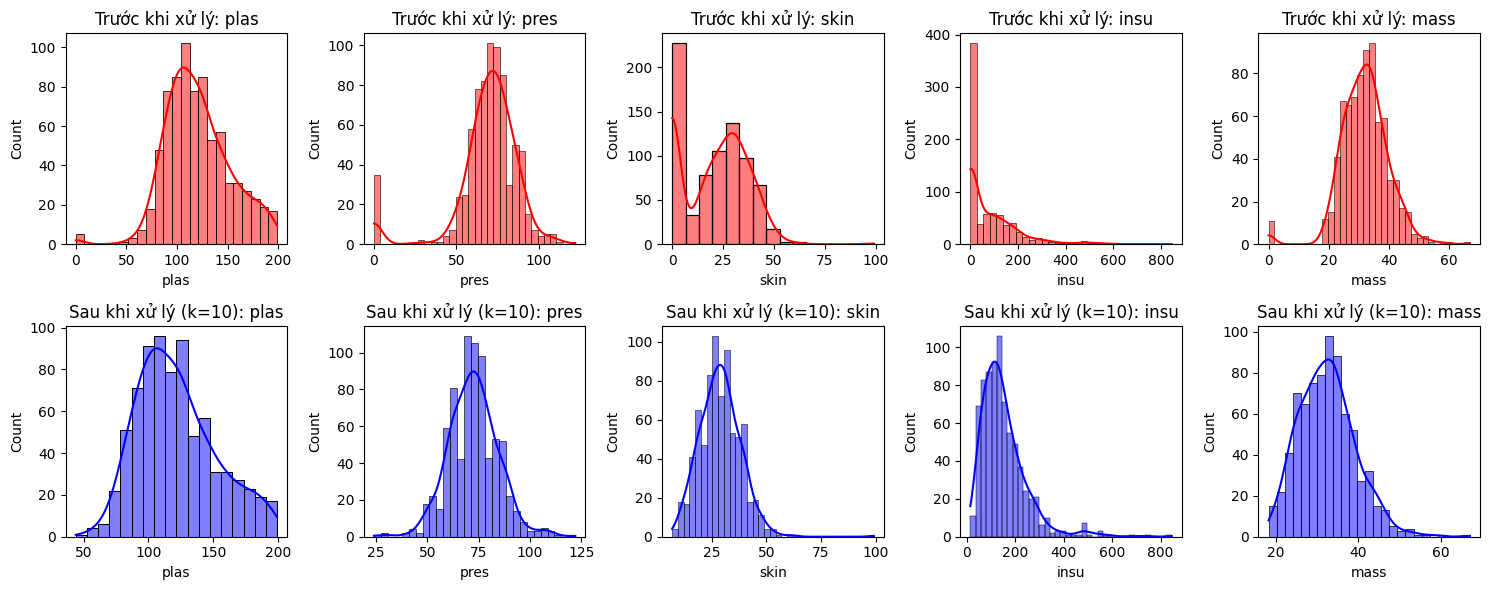

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
df = pd.read_csv("/content/drive/MyDrive/diabetes.csv")
cols_to_impute = ["plas", "pres", "skin", "insu", "mass"]
df_original = df.copy()
df_impute = df.copy()
df_impute[cols_to_impute] = df_impute[cols_to_impute].replace(0, np.nan)
imputer = KNNImputer(n_neighbors=10)
df_imputed = df_impute.copy()
df_imputed[cols_to_impute] = imputer.fit_transform(df_impute[cols_to_impute])
fig, axes = plt.subplots(nrows=2, ncols=len(cols_to_impute), figsize=(15, 6))
for i, col in enumerate(cols_to_impute):
    sns.histplot(df_original[col], ax=axes[0, i], kde=True, color="red")
    axes[0, i].set_title(f"Trước khi xử lý: {col}")
    sns.histplot(df_imputed[col], ax=axes[1, i], kde=True, color="blue")
    axes[1, i].set_title(f"Sau khi xử lý (k=10): {col}")
plt.tight_layout()
plt.show()

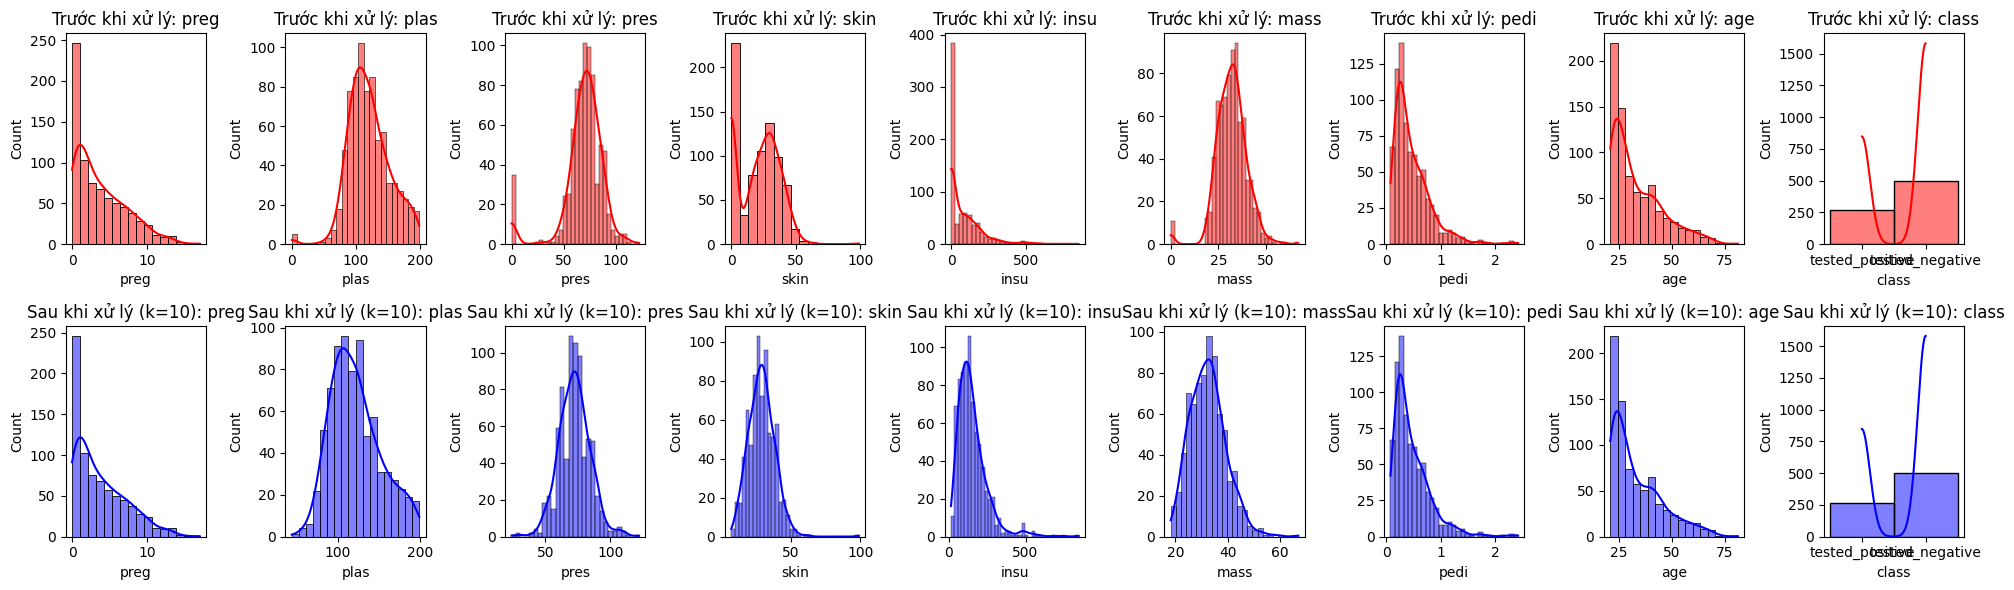

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer

# Đọc dữ liệu
df = pd.read_csv("/content/drive/MyDrive/diabetes.csv")

# Các cột có giá trị 0 cần thay thế
cols_to_impute = ["plas", "pres", "skin", "insu", "mass"]

# Lưu danh sách tất cả các cột
all_columns = df.columns.tolist()

# Sao lưu dữ liệu gốc
df_original = df.copy()

# Thay thế giá trị 0 bằng NaN để KNN hoạt động đúng
df_impute = df.copy()
df_impute[cols_to_impute] = df_impute[cols_to_impute].replace(0, np.nan)

# Áp dụng KNN Imputer với k=10
imputer = KNNImputer(n_neighbors=10)
df_imputed = df_impute.copy()
df_imputed[cols_to_impute] = imputer.fit_transform(df_impute[cols_to_impute])

# Vẽ biểu đồ so sánh cho toàn bộ 8 cột
fig, axes = plt.subplots(nrows=2, ncols=len(all_columns), figsize=(20, 6))

for i, col in enumerate(all_columns):
    # Biểu đồ trước khi xử lý
    sns.histplot(df_original[col], ax=axes[0, i], kde=True, color="red")
    axes[0, i].set_title(f"Trước khi xử lý: {col}")

    # Biểu đồ sau khi xử lý
    sns.histplot(df_imputed[col], ax=axes[1, i], kde=True, color="blue")
    axes[1, i].set_title(f"Sau khi xử lý (k=10): {col}")

plt.tight_layout()
plt.show()

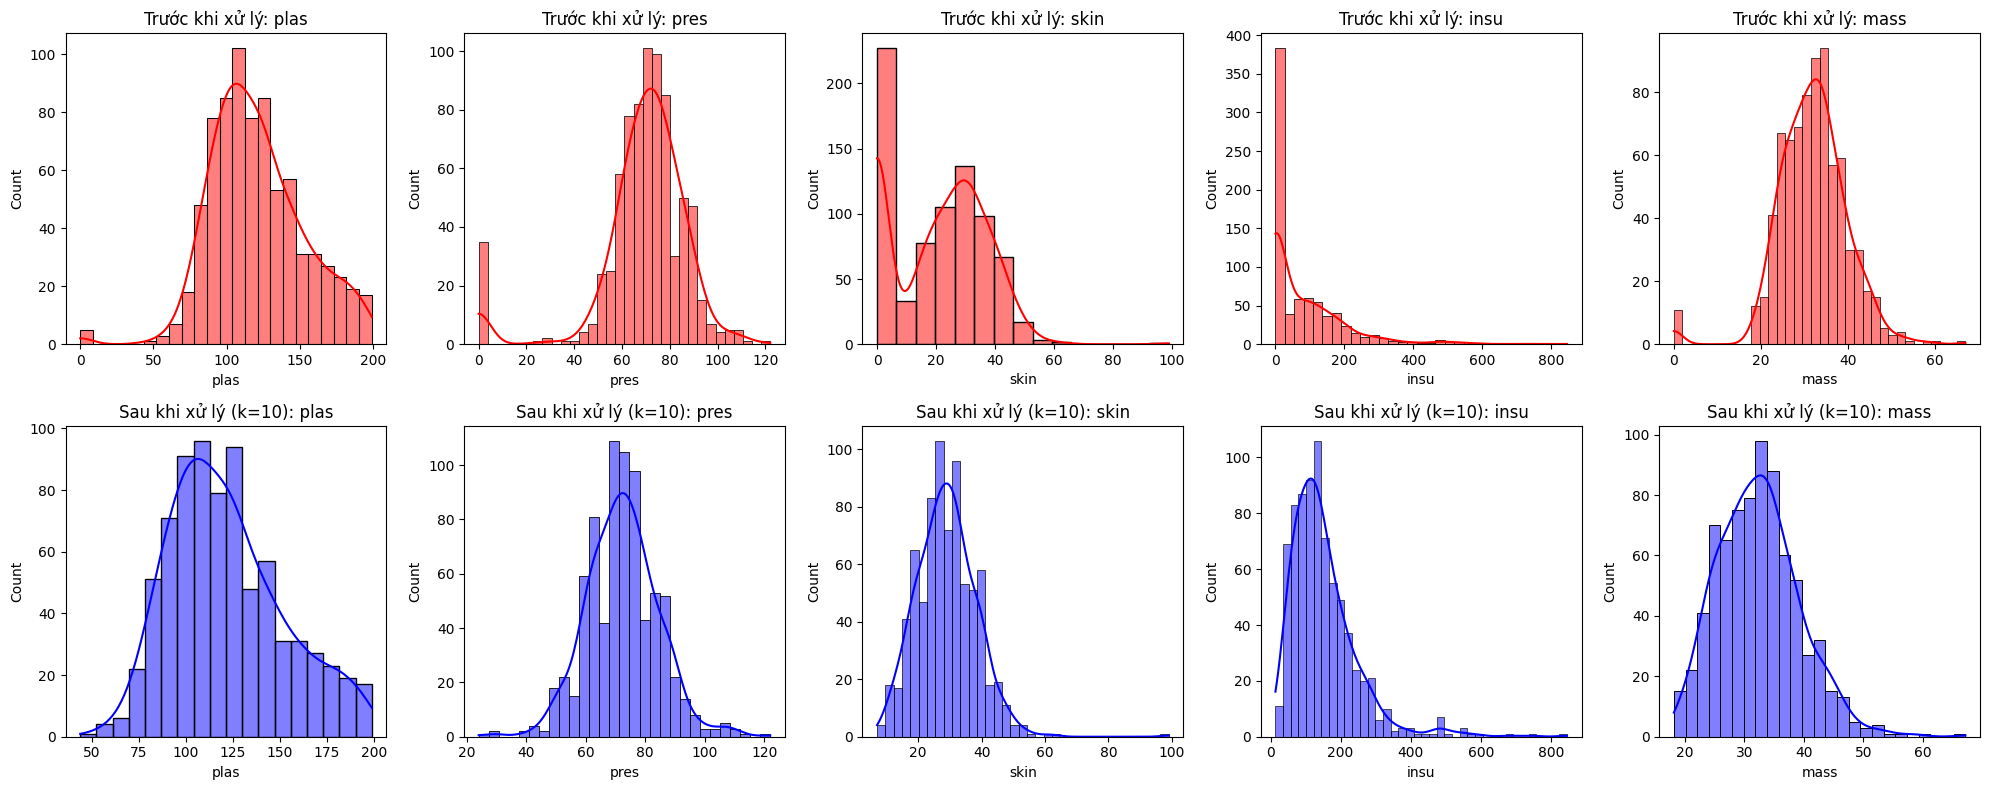

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer

# Đọc dữ liệu
df = pd.read_csv("/content/drive/MyDrive/diabetes.csv")

# Các cột cần thay thế giá trị 0
cols_to_impute = ["plas", "pres", "skin", "insu", "mass"]

# Tạo bản sao df_cleaned để xử lý
df_cleaned = df.copy()
df_cleaned[cols_to_impute] = df_cleaned[cols_to_impute].replace(0, np.nan)

# Áp dụng KNN Imputer với k=10
imputer = KNNImputer(n_neighbors=10)
df_cleaned[cols_to_impute] = imputer.fit_transform(df_cleaned[cols_to_impute])

# Tạo biểu đồ so sánh
fig, axes = plt.subplots(nrows=2, ncols=len(cols_to_impute), figsize=(20, 8))

for i, col in enumerate(cols_to_impute):
    # Biểu đồ trước khi xử lý
    sns.histplot(df[col], ax=axes[0, i], kde=True, color="red")
    axes[0, i].set_title(f"Trước khi xử lý: {col}")

    # Biểu đồ sau khi xử lý
    sns.histplot(df_cleaned[col], ax=axes[1, i], kde=True, color="blue")
    axes[1, i].set_title(f"Sau khi xử lý (k=10): {col}")

plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer

# Đọc dữ liệu
df = pd.read_csv("/content/drive/MyDrive/diabetes.csv")

# Các cột có giá trị 0 cần thay thế
cols_to_impute = ["plas", "pres", "skin", "insu", "mass"]

# Tạo bản sao để xử lý, giữ nguyên df gốc
df_cleaned = df.copy()

# Thay thế giá trị 0 bằng NaN để KNN hoạt động đúng
df_cleaned[cols_to_impute] = df_cleaned[cols_to_impute].replace(0, np.nan)

# Áp dụng KNN Imputer với k=10
imputer = KNNImputer(n_neighbors=10)
df_cleaned[cols_to_impute] = imputer.fit_transform(df_cleaned[cols_to_impute])

# Kiểm tra kết quả
print(df_cleaned.head())  # In 5 dòng đầu của df_cleaned sau khi xử lý


   preg   plas  pres  skin   insu  mass   pedi  age            class
0     6  148.0  72.0  35.0  196.7  33.6  0.627   50  tested_positive
1     1   85.0  66.0  29.0   68.4  26.6  0.351   31  tested_negative
2     8  183.0  64.0  28.3  284.5  23.3  0.672   32  tested_positive
3     1   89.0  66.0  23.0   94.0  28.1  0.167   21  tested_negative
4     0  137.0  40.0  35.0  168.0  43.1  2.288   33  tested_positive


In [ ]:
from flask import Flask, request, jsonify
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from flask_cors import CORS
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
app = Flask(__name__)
CORS(app)
# Định nghĩa thuật toán KNN
class KNN:
    def __init__(self, k=13):
        self.k = k

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        predictions = []
        for x in X_test:
            distances = [np.sqrt(np.sum((x - x_train) ** 2)) for x_train in self.X_train]
            k_indices = np.argsort(distances)[:self.k]
            k_nearest_labels = [self.y_train[i] for i in k_indices]
            predictions.append(max(set(k_nearest_labels), key=k_nearest_labels.count))
        return predictions
# Load dataset bệnh tiểu đường
df = pd.read_csv("/content/drive/MyDrive/diabetes_cleaned.csv")

# Tách features và labels
df.iloc[:, -1] = df.iloc[:, -1].replace({"tested_positive": 1, "tested_negative": 0})

# Tách features và labels
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values.astype(int)  # Đảm bảo nhãn là số nguyên

# Chia dữ liệu train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Huấn luyện mô hình KNN
knn = KNN(k=13)
knn.fit(X_train, y_train)
# Dự đoán trên tập kiểm tra
@app.route("/predict", methods=["POST"])
def predict():
    try:
        data = request.get_json()
        input_data = np.array([data["preg"], data["plas"], data["pres"], data["skin"], data["insu"],
                               data["mass"], data["pedi"], data["age"]])
        input_data = scaler.transform([input_data])
        result = knn.predict(input_data)

        return jsonify({"prediction": int(result[0])})
    except Exception as e:
        return jsonify({"error": str(e)})

if __name__ == "__main__":
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


<ipython-input-3-8041121ac4a1>:31: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.iloc[:, -1] = df.iloc[:, -1].replace({"tested_positive": 1, "tested_negative": 0})
INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat


In [ ]:
#Tính ĐỘ CHÍNH XÁC ỨNG VỚI RANDOM_STATE CHAỴ TỪ 0-50
from flask import Flask, request, jsonify
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from flask_cors import CORS
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

app = Flask(__name__)
CORS(app)


class KNN:
    def __init__(self, k=13):
        self.k = k

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        predictions = []
        for x in X_test:
            distances = [np.sqrt(np.sum((x - x_train) ** 2)) for x_train in self.X_train]
            k_indices = np.argsort(distances)[:self.k]
            k_nearest_labels = [self.y_train[i] for i in k_indices]
            predictions.append(max(set(k_nearest_labels), key=k_nearest_labels.count))
        return predictions


# Load dataset bệnh tiểu đường
df = pd.read_csv("/content/drive/MyDrive/diabetes_cleaned.csv")
df.iloc[:, -1] = df.iloc[:, -1].replace({"tested_positive": 1, "tested_negative": 0})

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values.astype(int)

scaler = StandardScaler()

accuracies = []
for i in range(0,50):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    knn = KNN(k=13)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f"Lần {i}: Độ chính xác = {accuracy:.2f}")

print(f"Độ chính xác trung bình: {np.mean(accuracies):.2f}")



if __name__ == "__main__":
    app.run(debug=True)


<ipython-input-4-5a7d493400f4>:34: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.iloc[:, -1] = df.iloc[:, -1].replace({"tested_positive": 1, "tested_negative": 0})


Lần 0: Độ chính xác = 0.82
Lần 1: Độ chính xác = 0.86
Lần 2: Độ chính xác = 0.75
Lần 3: Độ chính xác = 0.74
Lần 4: Độ chính xác = 0.74
Lần 5: Độ chính xác = 0.79
Lần 6: Độ chính xác = 0.76
Lần 7: Độ chính xác = 0.78
Lần 8: Độ chính xác = 0.75
Lần 9: Độ chính xác = 0.76
Lần 10: Độ chính xác = 0.71
Lần 11: Độ chính xác = 0.77
Lần 12: Độ chính xác = 0.80
Lần 13: Độ chính xác = 0.71
Lần 14: Độ chính xác = 0.73
Lần 15: Độ chính xác = 0.75
Lần 16: Độ chính xác = 0.81
Lần 17: Độ chính xác = 0.77
Lần 18: Độ chính xác = 0.71


KeyboardInterrupt: 

In [ ]:
#TÍNH ĐỘ CHÍNH XÁC CAO NHẤT TỪNG K VỚI RANDOM_STATE TỪ[0,50]
from flask import Flask, request, jsonify
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from flask_cors import CORS
from sklearn.metrics import accuracy_score

app = Flask(__name__)
CORS(app)


class KNN:
    def __init__(self, k=13):
        self.k = k

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        predictions = []
        for x in X_test:
            distances = [np.sqrt(np.sum((x - x_train) ** 2)) for x_train in self.X_train]
            k_indices = np.argsort(distances)[:self.k]
            k_nearest_labels = [self.y_train[i] for i in k_indices]
            predictions.append(max(set(k_nearest_labels), key=k_nearest_labels.count))
        return predictions


# Load dataset bệnh tiểu đường
df = pd.read_csv("/content/drive/MyDrive/diabetes_cleaned.csv")
df.iloc[:, -1] = df.iloc[:, -1].replace({"tested_positive": 1, "tested_negative": 0})

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values.astype(int)

scaler = StandardScaler()
best_k = None
best_accuracy = 0
accuracy_results = {}

# Chạy với các giá trị k từ 5 đến 31 (số lẻ)
for k in range(5, 32, 2):
    max_accuracy = 0  # Lưu độ chính xác cao nhất của mỗi k

    for i in range(50):  # random_state từ 0 đến 49
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)

        knn = KNN(k=k)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        max_accuracy = max(max_accuracy, accuracy)  # Cập nhật độ chính xác cao nhất cho k

    accuracy_results[k] = max_accuracy
    print(f"K = {k}, Độ chính xác cao nhất: {max_accuracy:.4f}")

    if max_accuracy > best_accuracy:
        best_accuracy = max_accuracy
        best_k = k

print(f"Best K: {best_k}, Best Accuracy: {best_accuracy:.4f}")




if __name__ == "__main__":
    app.run(debug=True)


<ipython-input-5-d41f7c361855>:34: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.iloc[:, -1] = df.iloc[:, -1].replace({"tested_positive": 1, "tested_negative": 0})


K = 5, Độ chính xác cao nhất: 0.8052
K = 7, Độ chính xác cao nhất: 0.8182


KeyboardInterrupt: 

In [ ]:
#tÍNH ĐỘ CHÍNH XÁC TRUNG BÌNH TỪNG K VỚI RANDOM_STATE TỪ[0,50]
from flask import Flask, request, jsonify
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from flask_cors import CORS
from sklearn.metrics import accuracy_score

app = Flask(__name__)
CORS(app)


class KNN:
    def __init__(self, k=13):
        self.k = k

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        predictions = []
        for x in X_test:
            distances = [np.sqrt(np.sum((x - x_train) ** 2)) for x_train in self.X_train]
            k_indices = np.argsort(distances)[:self.k]
            k_nearest_labels = [self.y_train[i] for i in k_indices]
            predictions.append(max(set(k_nearest_labels), key=k_nearest_labels.count))
        return predictions


# Load dataset bệnh tiểu đường
df = pd.read_csv("/content/drive/MyDrive/diabetes_cleaned.csv")
df.iloc[:, -1] = df.iloc[:, -1].replace({"tested_positive": 1, "tested_negative": 0})

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values.astype(int)

scaler = StandardScaler()
best_k = None
best_accuracy = 0
accuracy_results = {}

# Chạy với các giá trị k từ 5 đến 31 (số lẻ)
for k in range(5, 32, 2):
    accuracies = []

    for i in range(50):  # random_state từ 0 đến 49
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)

        knn = KNN(k=k)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)

    avg_accuracy = np.mean(accuracies)
    accuracy_results[k] = avg_accuracy

    print(f"K = {k}, Độ chính xác trung bình: {avg_accuracy:.4f}")

    if avg_accuracy > best_accuracy:
        best_accuracy = avg_accuracy
        best_k = k

print(f"Best K: {best_k}, Best Accuracy: {best_accuracy:.4f}")






if __name__ == "__main__":
    app.run(debug=True)


<ipython-input-7-a5afad3717cc>:34: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.iloc[:, -1] = df.iloc[:, -1].replace({"tested_positive": 1, "tested_negative": 0})


K = 5, Độ chính xác trung bình: 0.7358
K = 7, Độ chính xác trung bình: 0.7479
K = 9, Độ chính xác trung bình: 0.7569
K = 11, Độ chính xác trung bình: 0.7577
K = 13, Độ chính xác trung bình: 0.7595
K = 15, Độ chính xác trung bình: 0.7603


KeyboardInterrupt: 